In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
p = plt.rcParams.find_all(pattern='size')
#plt.rcParams['font.size'] = 14
p

RcParams({'agg.path.chunksize': 0,
          'axes.labelsize': 20.0,
          'axes.titlesize': u'large',
          'boxplot.flierprops.markersize': 6.0,
          'boxplot.meanprops.markersize': 6.0,
          'errorbar.capsize': 0.0,
          'figure.figsize': [6.0, 4.0],
          'figure.titlesize': 'large',
          'font.size': 10.0,
          'legend.fontsize': 'medium',
          'lines.markersize': 6.0,
          'ps.papersize': 'letter',
          'xtick.labelsize': 14.0,
          'xtick.major.size': 6.0,
          'xtick.minor.size': 3.0,
          'ytick.labelsize': 14.0,
          'ytick.major.size': 6.0,
          'ytick.minor.size': 3.0})

In [123]:
def scale_text(scale='bigger',fig_adj=False):
    if isinstance(scale,str):
        if scale=='bigger':
            scale = 1.25
        elif scale=='smaller':
            scale = 0.8
        elif scale=='default':
            
    size_params = plt.rcParams.find_all(pattern='font.size')
    size_params.update(plt.rcParams.find_all(pattern='labelsize'))
    
    fig_sizes = plt.rcParams['figure.figsize']
    if fig_adj:
        plt.rcParams['figure.figsize'] = [fig_sizes[0]*scale,fig_sizes[1]*scale]
    for i in size_params:
        if isinstance(plt.rcParams[i],float):
            plt.rcParams[i]*=scale
            
            
    
    
    

In [85]:
scale_text('smaller')

In [76]:
def squarefig(fold_on='x'):
    sizes = plt.rcParams['figure.figsize']
    if fold_on == 'x':
        plt.rcParams['figure.figsize'] = [sizes[0],sizes[0]]
    elif fold_on == 'y':
        plt.rcParams['figure.figsize'] = [sizes[1],sizes[1]]


In [79]:
squarefig()

In [57]:
plt.show()

In [13]:
def demo():
    ews = np.loadtxt('measured_brg_ews.txt',usecols=(1,2,3,4,5))
    ews = ews.T 

    measured_ews = ews[0]
    measured_ew_unc = ews[1]
    measured_ew_unc_log = 0.434 * (measured_ew_unc / measured_ews)
    joel_ews = ews[3]
    joel_minus = ews[2]
    joel_plus = ews[4]
    joel_errs = np.array([joel_ews-joel_minus,joel_plus-joel_ews])
    joel_errs_log = 0.434 * (joel_errs / joel_ews)
    #plot_bounds = np.array([np.max([measured_ews,joel_plus]),np.max([measured_ews,joel_plus])])
    #plt.rcParams.update({'font.size': 15})
    fig, ax = plt.subplots()
    ax.errorbar(np.log10(joel_ews),np.log10(measured_ews),yerr=measured_ew_unc_log,xerr=joel_errs_log,fmt='None',color='#113166',alpha=0.15)
    ax.plot(np.log10(joel_ews),np.log10(measured_ews),'s',color='#006289',ms=7,alpha=0.9)
    #ax.plot([0.0001,np.max([measured_ews,joel_plus])],[0.0001,np.max([measured_ews,joel_plus])],color='k',alpha=0.8)
    #plt.subplots_adjust(right=0.98,top=0.98)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.tick_params(axis='both',which='both',direction='in',top=True,right=True)
    ax.set_ylabel('log EW[Br-$\gamma$] (Measured)')
    ax.set_xlabel('log EW[Br-$\gamma$] (predicted from photometry)')
    ax.set_xlim((-0.3,1.8))
    ax.set_ylim((-1.05,2.5))
    #ax.set_xticks([-0.5,0.0,0.5,1.0,])
    #ax.set_yticks([-0.5,0.0,0.5,1.0,1.5])
    ax.plot([-5,5],[-5,5],'k',alpha=0.5)
    ax.text(1.6,-0.72,'mean offset = 0.07 dex',horizontalalignment='right')
    ax.text(1.6,-0.9,'biweight scatter = 0.27 dex',horizontalalignment='right')
    #ax.plot(0.55,-0.48,'v',color='#7c0b0b',alpha=0.8)
    plt.show()

    #residuals = measured_ews - joel_ews 
    #std = np.log10(np.std(residuals))
    #print(std)



    #fig2, ax2 = plt.subplots(figsize=(5,5))
    #ax2.errorbar(measured_ews,joel_ews-measured_ews,yerr=joel_errs,xerr=measured_ew_unc,fmt='s',alpha=0.8)
    #plt.show()

In [4]:
class Astroplots():
    def __init__(self):
        self.orig_params = plt.rcParams.copy()
        
    def default_all(self):
        for i in plt.rcParams.keys():
            plt.rcParams[i] = self.orig_params[i]
   
    def squarefig(self,fold_on='x'):
        sizes = plt.rcParams['figure.figsize']
        if fold_on == 'x':
            plt.rcParams['figure.figsize'] = [sizes[0],sizes[0]]
        elif fold_on == 'y':
            plt.rcParams['figure.figsize'] = [sizes[1],sizes[1]]
   
    def bigger_onplot_text(self,scale):
        plt.rcParams['figure.fontsize']*=scale
        
    def scale_text(self,scale='bigger',fig_adj=False):
        if isinstance(scale,str):
            if scale=='bigger':
                scale = 1.25
            elif scale=='smaller':
                scale = 0.8
            elif scale=='default':
                pass
        size_params = plt.rcParams.find_all(pattern='font.size')
        size_params.update(plt.rcParams.find_all(pattern='labelsize'))
    
        fig_sizes = plt.rcParams['figure.figsize']
        if fig_adj:
            plt.rcParams['figure.figsize'] = [fig_sizes[0]*scale,fig_sizes[1]*scale]
        for i in size_params:
            if isinstance(plt.rcParams[i],float):
                plt.rcParams[i]*=scale

In [5]:
astroplots = Astroplots()

In [9]:
astroplots.default_all()

In [11]:
astroplots.squarefig()

In [7]:
astroplots.scale_text(1.5,fig_adj=True)

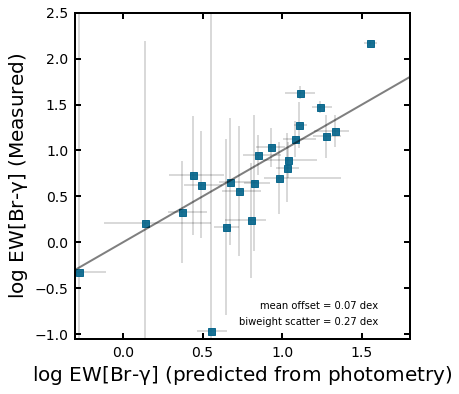

In [14]:
demo()

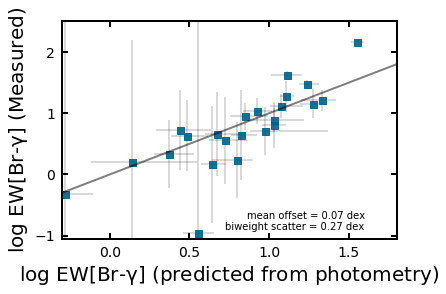

In [15]:
astroplots.default_all()
demo()

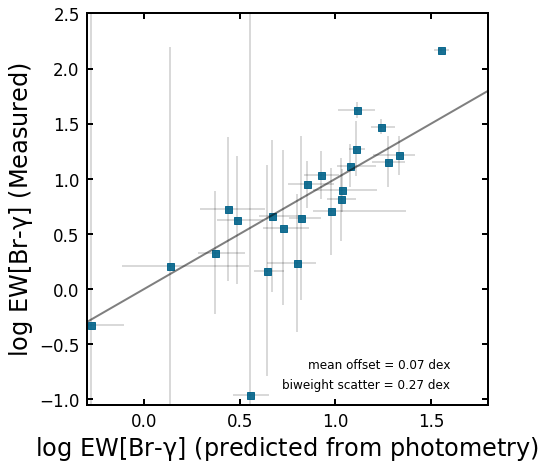

In [20]:
astroplots.default_all()
astroplots.squarefig()
astroplots.scale_text(1.2,fig_adj=True)
demo()


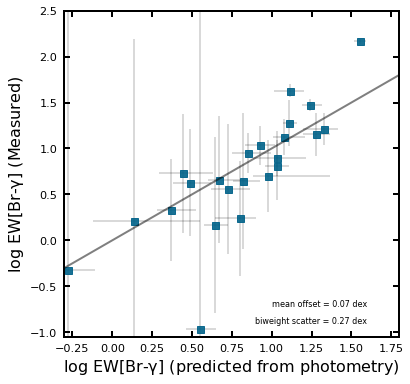

In [21]:
astroplots.default_all()
astroplots.squarefig()
astroplots.scale_text(0.8,fig_adj=False)
demo()

In [ ]:
astroplots.default_all()
astroplots.squarefig()
astroplots.scale_text([1,2,3])
demo()